# Colab test
Google colab is a simple free way to run python code. Most of the chapters and assignments in this book have a button to open in colab. This notebook is a simple compact test for all the others. A quick way to make sure the rest should work. 

_Hopefully._

## Assignment 1

Use the button to open this assignment in a colab. Once it is open, if it is open, run all the cells. Read each cell, then run it, that is. This simple test of the colab is also a good demonstration of many of the experiments and assignments you will see.

If there are _any_ errors, first try to take a quick look for obvious problems and fix them yourself. If that doesn't work, or you haven't a damn clue how to look for problems, ask an instructor. Or, a friend. Or, stack overflow. 

If there are no errors, celebrate and consider _this_ assignment complete. 

_Note:_ I assume that you, reader, are familiar with python programming already. If you are not see the _Programming in python_ assignment.


## Install some modules
Colab's come with many of the libraries we will need. Let's install a couple more, _explorationlib_ being the most important. It's the one we will be using, and that was written to support this book.

In [ ]:
!pip install git+https://github.com/parenthetical-e/explorationlib
!pip install celluloid # for the gifs

## Import some modules
From the standard library

In [1]:
import shutil
import glob
import os
import copy
import sys

that are common to scientific programming in python

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import a bunch of functions from _explorationlib_.

In [3]:
# All the explorers we will play with are called
# "agents"; a bit of computer science jargon
from explorationlib import agent

# The environments we will simulate live in a "gym"
from explorationlib import local_gym as gym

# Computational experiments are run with 'experiment'
from explorationlib.run import experiment

# Here are some tools to select, save, and load
# data from computational experiments
from explorationlib.util import select_exp
from explorationlib.util import load
from explorationlib.util import save

# A bunch of tools for plotting and for
# movie making
from explorationlib.plot import plot_position2d
from explorationlib.plot import plot_length_hist
from explorationlib.plot import plot_length
from explorationlib.plot import plot_targets2d
from explorationlib.plot import render_2d
from explorationlib.plot import show_gif

# A couple metrics for scoring how well, or poorly,
# an exploration experiment went.
from explorationlib.score import search_efficiency
from explorationlib.score import average_reward

## Configure plots 
to be be nicer looking

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

## Better autocomplete and development
In our notebooks. 

In [5]:
%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2

## "data/"
Make a folder to keep experimental data in. We will use it for all our examples.

In [6]:
if not os.path.exists("data"):
    os.makedirs("data")

# Run a simple experiment
1. Instantiate a random walker, in a small 2d box environment, with walls and a lot of targets to find when exploring. Each target should have a value of '1'.
2. Run an experiment, for 200 steps. 
3. Plot the env, target, the agents path in the experiment. 
4. Make a movie of experiment.
5. Score the agent, and reward (targets), and its efficiency.

## 1.

In [48]:
# Parameters
exp_name = "data/colab_test_simple.pkl"  # all experiments need names
num_experiments = 1             # we only want to run one experiment 
num_steps = 200                 # how many exploration steps in space?

detection_radius = 1  # How far can the agent see?
boundary = (10, 10)   # a 2d world, 10 by 10
mode = "stopping"     # stop when we hit a wall
num_targets = 100     # how many thingss to "eat"?

# Setup targets
targets = gym.uniform_targets(num_targets, boundary)
values = gym.constant_values(targets, 1)

# Setup agent and env
env = gym.Bounded(boundary=boundary, mode=mode)
env.add_targets(targets, values)
brownian = agent.Diffusion2d(scale=2)

## 2.

In [49]:
# Cleanup old versions
for path in glob.glob(f"{exp_name}"):
    os.remove(path)

In [54]:
# Run!
experiment(exp_name, brownian, env, num_steps=num_steps, num_experiments=num_experiments)
exp_data = load(exp_name)

colab_test_simple: 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]


## 3.

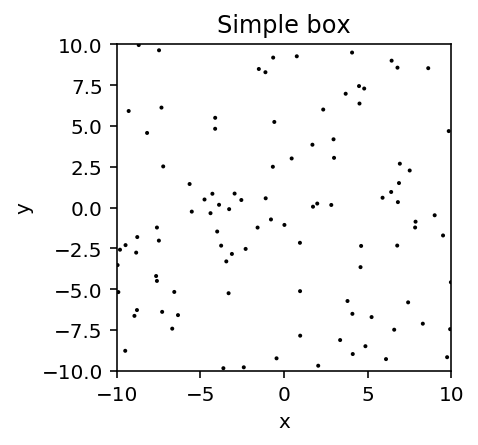

In [55]:
# Plot the 2d env, and the targets (black dots)
plot_targets2d(env, boundary=boundary, title="Simple box", figsize=(3,3))

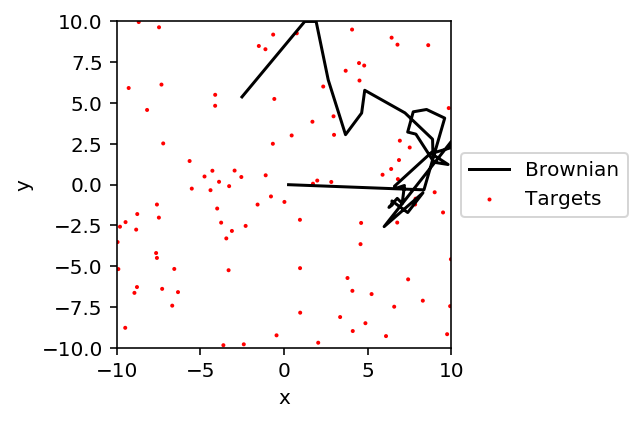

In [56]:
# Plot the positions the agent took during its
# random walk, and the targets (this time in red)
#
# Note: there are quite a few parameters you can play
# with to change the size of the plot, colors, and so on.
# See `explorationlib.plot` for all the options

# Agent
ax = None
ax = plot_position2d(
    exp_data,
    boundary=boundary,
    label="Brownian",
    color="black",
    alpha=1,
    ax=ax,
)
# Targets
ax = plot_targets2d(
    env,
    boundary=boundary,
    color="red",
    alpha=1,
    label="Targets",
    ax=ax,
)

## 4.

In [58]:
# this magic '%' is needed to only show the final movie
%matplotlib agg  

#!
gif_name = "data/colab_test_simple.gif"
render_2d(gif_name, env, exp_data, num_experiment=0, boundary=boundary)

# Clean up
%matplotlib inline

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.



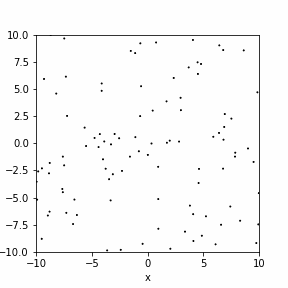

In [59]:
show_gif(gif_name) # The edges of get cutoff sometimes. Shrug.

## 5.

In [60]:
average_reward(exp_data)

0.48743718592964824

In [61]:
search_efficiency(exp_data)

[1.4686770919189542]